In [1]:
import numpy as np
import sys
sys.path.insert(0, '/data/SO2/SO24/ANDY/SOHI/Utils')
import Andy

import matplotlib.pyplot as plt

In [2]:
YG = np.load('inputs/ref/YG.npy')
XG = np.load('inputs/ref/XG.npy')
YC = np.load('inputs/ref/YC.npy')
XC = np.load('inputs/ref/XC.npy')
RF = np.load('inputs/ref/RF.npy')

In [10]:
bath, XC , YC = Andy.loads.sohi_meta(field_name = 'bathymetry', lon_bounds = XC, lat_bounds=YC)

mod = np.zeros(bath.shape)
mod[:]=1
mod[bath<-700] = 0
mod[:, 1600:] = 1
mod[250:270,300:325] = 0

for x in range(mod.shape[1]):
    for y in range(mod.shape[0]-1, -1, -1):
        if mod[y, x] == 1:
            mod[:y, x] = 1
            break

bath[mod!=1] = 0

#np.save('inputs/ref/700m_isobath.npy', mod)

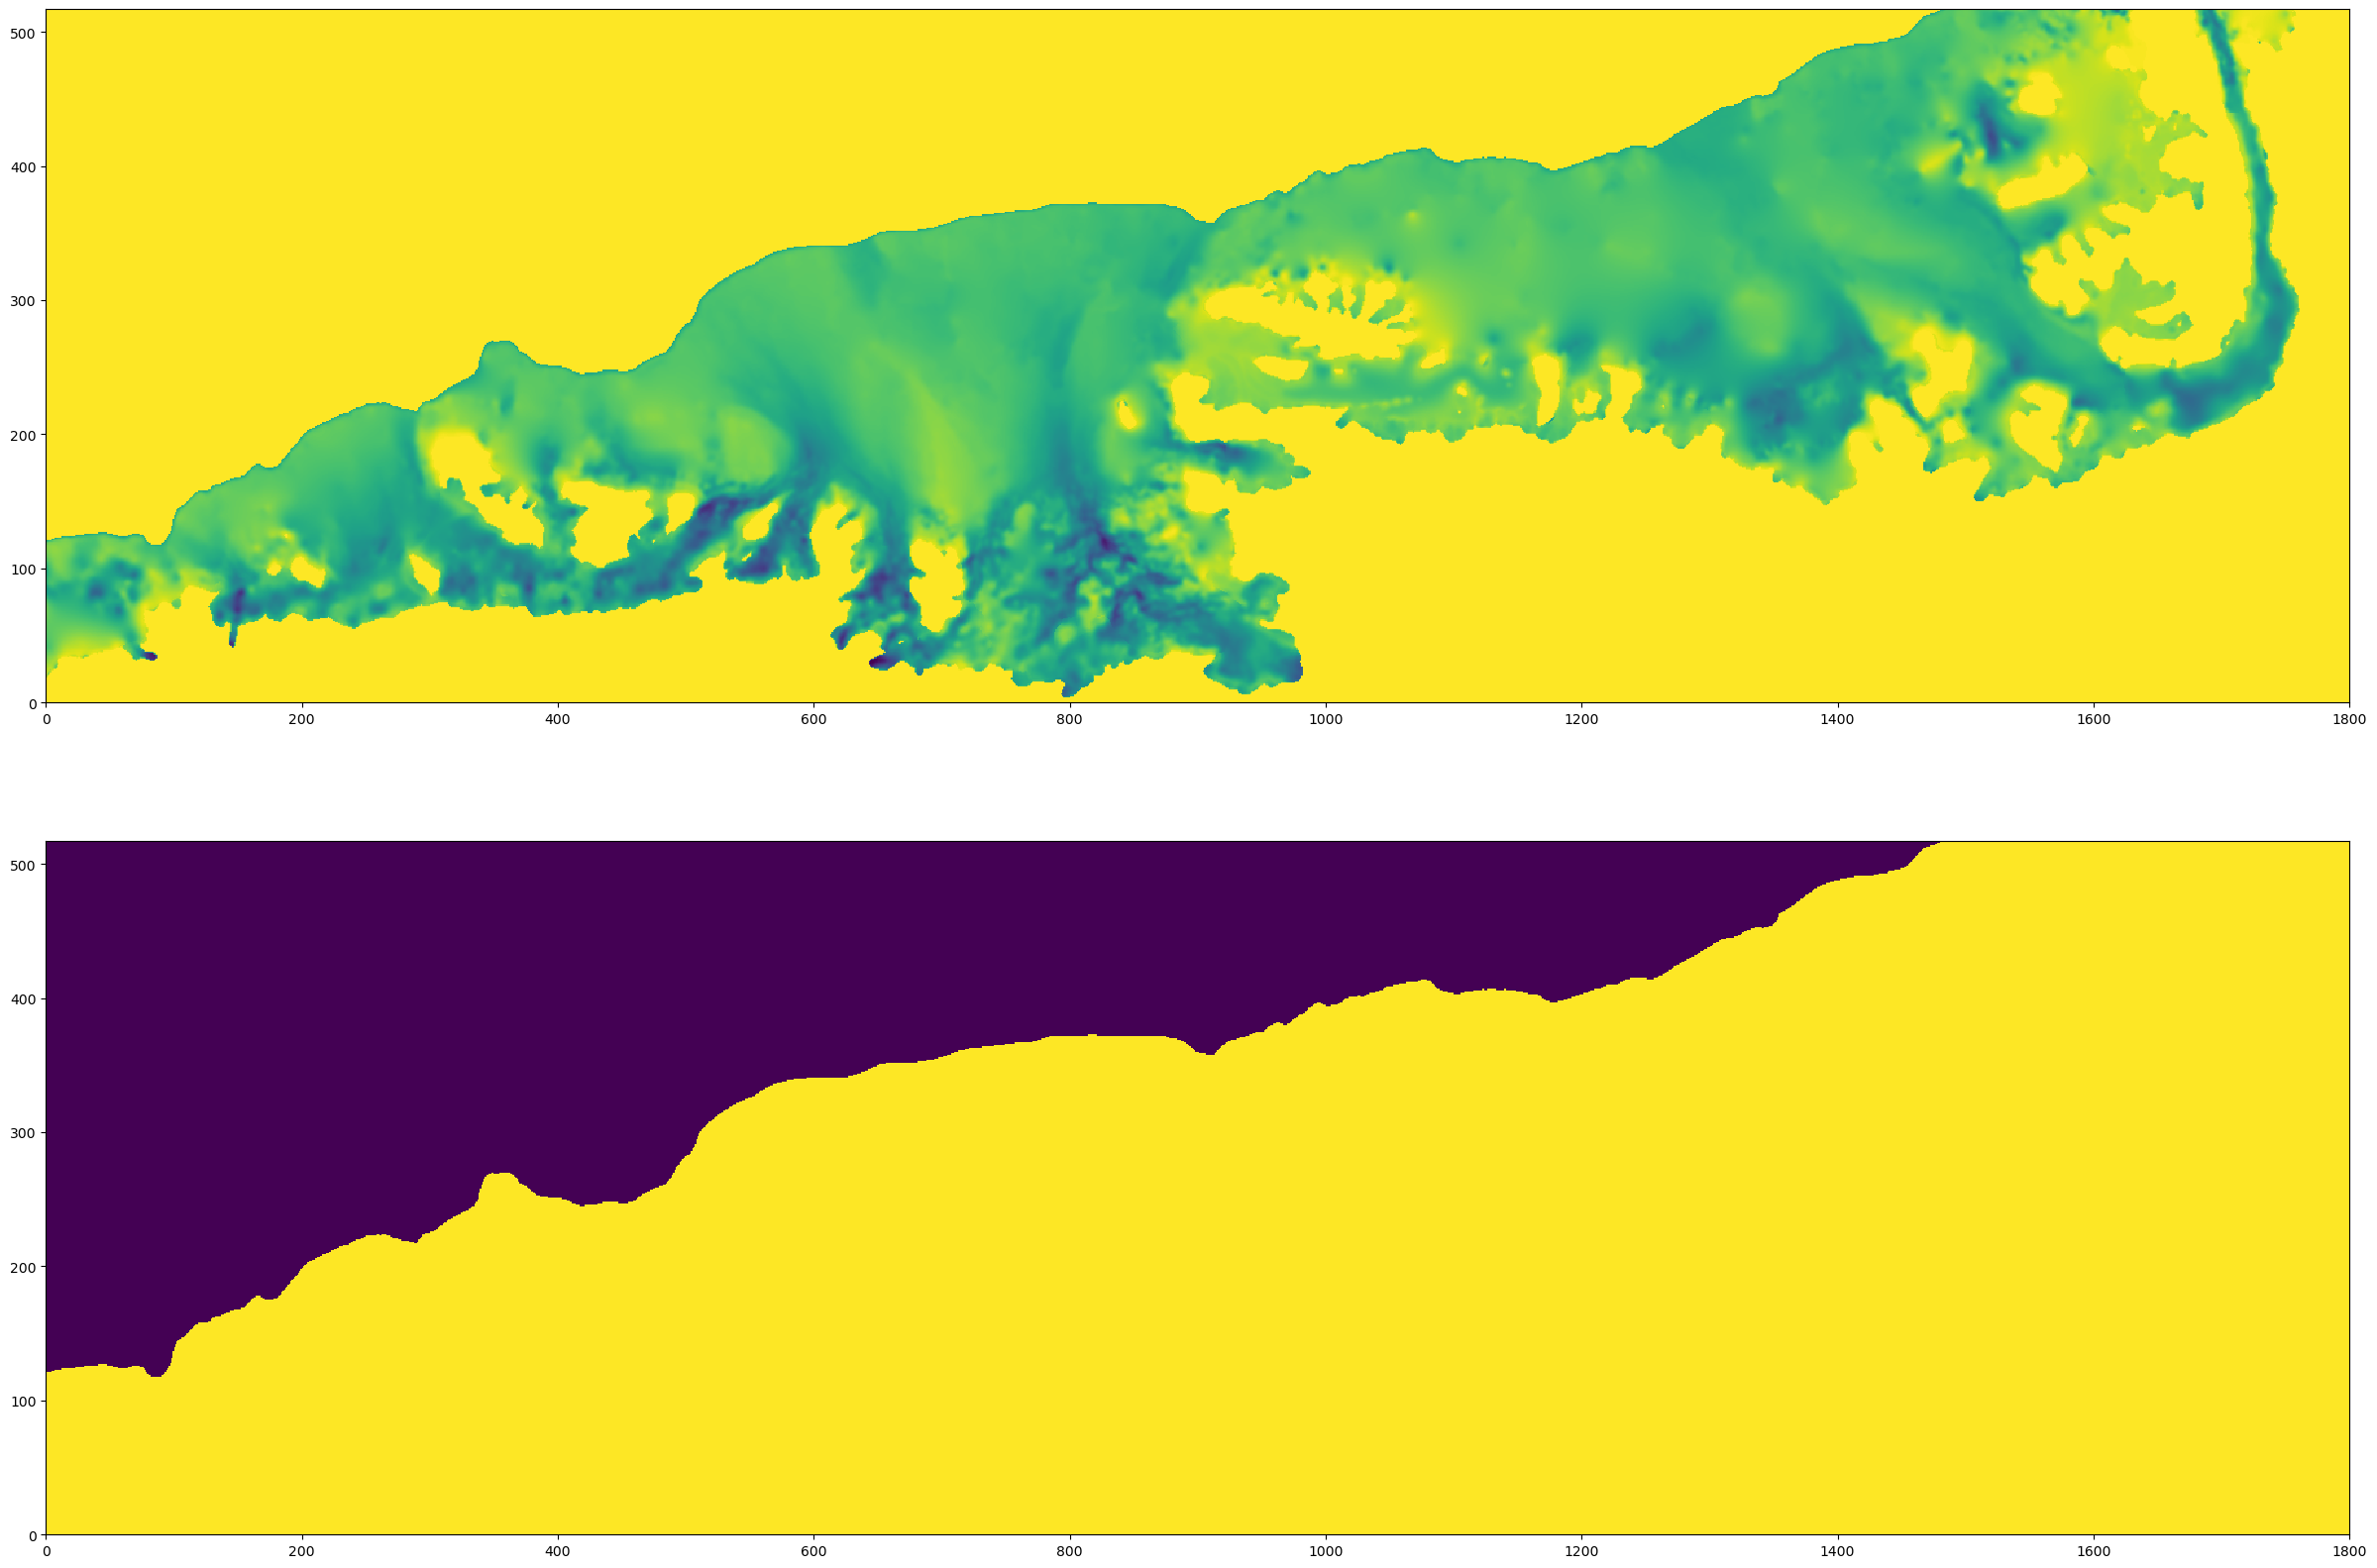

In [11]:
fig, ax = plt.subplots(nrows=2,figsize=(30,20))
ax[0].pcolormesh(bath)
ax[1].pcolormesh(mod)